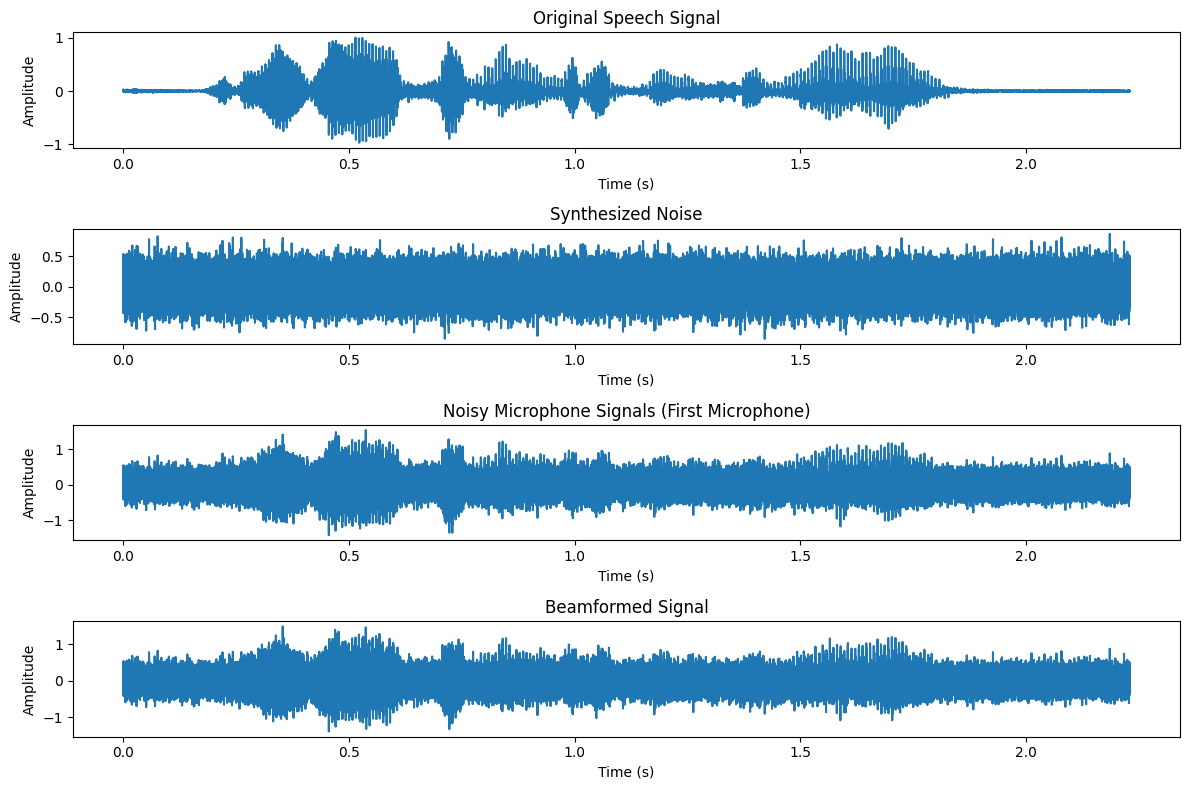

SNR Before Beamforming: -1.00 dB
SNR After Beamforming: 1.99 dB


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

# Load the speech signal
fs, speech_signal = wav.read('./Data/speech_1.wav')  # Ensure speech_1.wav is in the same directory
speech_signal = speech_signal / np.max(np.abs(speech_signal))  # Normalize to [-1, 1]

# Parameters
c = 343     # Speed of sound (m/s)
d = 0.05    # Distance between microphones (m)
num_mics = 4  # Number of microphones in the array
theta = 30   # Angle of arrival of the signal (degrees)
noise_level = 0.2  # Noise level

# Generate synthesized noise
noise = noise_level * np.random.normal(size=len(speech_signal))

# Simulate microphone array signals with delays
mic_signals = np.zeros((num_mics, len(speech_signal)))
for i in range(num_mics):
    delay = (i * d * np.sin(np.radians(theta))) / c  # Delay for each mic
    sample_delay = int(delay * fs)  # Convert delay to samples
    mic_signals[i, sample_delay:] = speech_signal[:len(speech_signal) - sample_delay]

# Add noise to the microphone signals
mic_signals_noisy = mic_signals + noise

# Perform delay-and-sum beamforming
beamformed_signal = np.zeros(len(speech_signal))
for i in range(num_mics):
    beamformed_signal += mic_signals_noisy[i]
beamformed_signal /= num_mics  # Normalize

# Calculate SNR
def calculate_snr(signal, noise):
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)
    return 10 * np.log10(signal_power / noise_power)

# SNR before and after beamforming
snr_before = calculate_snr(speech_signal, noise)
snr_after = calculate_snr(beamformed_signal, beamformed_signal - speech_signal)

# Plot the signals
t = np.linspace(0, len(speech_signal) / fs, len(speech_signal), endpoint=False)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.title("Original Speech Signal")
plt.plot(t, speech_signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 2)
plt.title("Synthesized Noise")
plt.plot(t, noise)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 3)
plt.title("Noisy Microphone Signals (First Microphone)")
plt.plot(t, mic_signals_noisy[0])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(4, 1, 4)
plt.title("Beamformed Signal")
plt.plot(t, beamformed_signal)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Print SNR results
print(f"SNR Before Beamforming: {snr_before:.2f} dB")
print(f"SNR After Beamforming: {snr_after:.2f} dB")

# Save the mixed signals to a file
output_filename = './Output/mic_signals_noisy.wav'
wav.write(output_filename, fs, (mic_signals_noisy[0] * 32767).astype(np.int16))  # Save as 16-bit PCM

# Save the beamformed signal to a file
output_filename = './Output/beamformed_signal.wav'
wav.write(output_filename, fs, (beamformed_signal * 32767).astype(np.int16))  # Save as 16-bit PCM

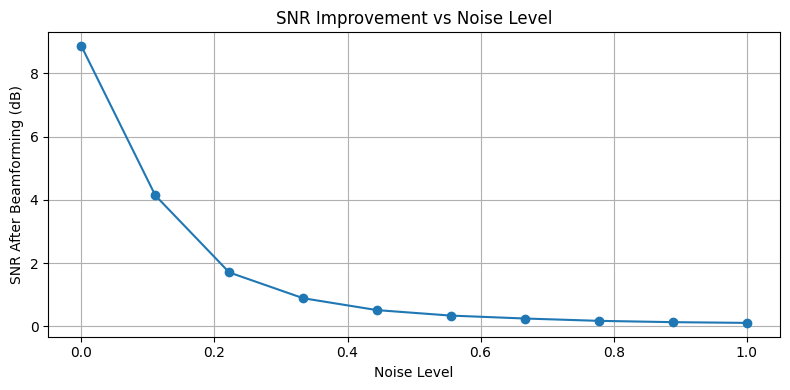

In [15]:
# Compute the SNR improvement at various noise levels
noise_levels = np.linspace(0, 1, 10)
snr_improvements = []
for noise_level in noise_levels:
    noise = noise_level * np.random.normal(size=len(speech_signal))
    mic_signals_noisy = mic_signals + noise
    beamformed_signal = np.zeros(len(speech_signal))
    for i in range(num_mics):
        beamformed_signal += mic_signals_noisy[i]
    beamformed_signal /= num_mics  # Normalize
    snr_after = calculate_snr(beamformed_signal, beamformed_signal - speech_signal)
    snr_improvements.append(snr_after)
# Plot SNR improvement
plt.figure(figsize=(8, 4))
plt.plot(noise_levels, snr_improvements, marker='o')
plt.title("SNR Improvement vs Noise Level")
plt.xlabel("Noise Level")
plt.ylabel("SNR After Beamforming (dB)")
plt.grid()
plt.tight_layout()
plt.show()
